<a href="https://colab.research.google.com/github/CleliaCaetano/-User-Behavior-Analysis-for-Optimizing-Engagement-on-Social-Media/blob/main/User_Behavior_Analysis_for_Optimizing_Engagement_on_Social_Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

User Behavior Analysis for Optimizing Engagement on Social Media
Platforms

Tasks:
- As a social media platform operator offering various features such as posts, messaging, and recommendations, we aim to improve user engagement and optimize personalized content delivery.
- To achieve this, we seek to analyze and categorize user behavior patterns based on their activity on the platform.

Objectives:
- Use time-series analysis to predict user activity over time.
- Apply Machine Learning tools to predict the type of post that will be made based on the day and time.

In [1]:
# Import Libraries:
# Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

# Visualization
import seaborn as sns # provide statistical graphs
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# We can suppress the warnings messages that may appear when we run our code.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
df = pd.read_csv('Instagram_users-datetime-posts-data.csv')
df.head()

User uuid  Likes  Days passed from post  Likes Score    Type  \
0          1    506                    657         0.74   Image   
1          1    385                    657         0.57   Image   
2          1    373                    666         0.55  Images   
3          1    312                    667         0.46  Images   
4          1    513                    674         0.75  Images   

   Numer of Tags  Numer of Comments       Date Posted  Year  Month  Day  Hour  \
0              3                 11  12/05/2019 21:18  2019      5   12    21   
1              0                  1  12/05/2019 14:25  2019      5   12    14   
2              4                 15  03/05/2019 15:18  2019      5    3    15   
3              4                  1  02/05/2019 16:40  2019      5    2    16   
4              5                  0  25/04/2019 16:51  2019      4   25    16   

   Minute  
0      18  
1      25  
2      18  
3      40  
4      51

In [3]:
# check the category of each column.
# check which columns contains categorical variables (object) and numerical variables (int64, float64).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178922 entries, 0 to 178921
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   User uuid              178922 non-null  int64  
 1   Likes                  178922 non-null  int64  
 2   Days passed from post  178922 non-null  int64  
 3   Likes Score            178922 non-null  float64
 4   Type                   178922 non-null  object 
 5   Numer of Tags          178922 non-null  int64  
 6   Numer of Comments      178922 non-null  int64  
 7   Date Posted            178922 non-null  object 
 8   Year                   178922 non-null  int64  
 9   Month                  178922 non-null  int64  
 10  Day                    178922 non-null  int64  
 11  Hour                   178922 non-null  int64  
 12  Minute                 178922 non-null  int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 17.7+ MB


**Note:** The dataset contains two distinct types of data:

- Numerical Data: Columns with int64 or float64 data types, representing quantitative values (e.g., Likes, Days Since Post, Year, etc.).
- Categorical Data: Columns with object data types, representing categorical or qualitative information (e.g., Type, Date Posted).

Exploratory data analysis (EDA)

In [4]:
# calculate the number of unique values in each column.
df.nunique(axis = 0)

User uuid                  1089
Likes                     46384
Days passed from post      2913
Likes Score                 101
Type                          3
Numer of Tags                32
Numer of Comments          6606
Date Posted              162417
Year                         12
Month                        12
Day                          31
Hour                         24
Minute                       60
dtype: int64

In [5]:
# drop columns that are irrelevant.
df.drop(['User uuid', 'Likes', 'Days passed from post', 'Likes Score', 'Numer of Tags', 'Numer of Comments'],
            axis=1, inplace=True)

In [6]:
# check the first 5 rows.
df.head(5)

Type       Date Posted  Year  Month  Day  Hour  Minute
0   Image  12/05/2019 21:18  2019      5   12    21      18
1   Image  12/05/2019 14:25  2019      5   12    14      25
2  Images  03/05/2019 15:18  2019      5    3    15      18
3  Images  02/05/2019 16:40  2019      5    2    16      40
4  Images  25/04/2019 16:51  2019      4   25    16      51

Missing Values

In [7]:
# display the missing values
df.isnull().sum()

Type           0
Date Posted    0
Year           0
Month          0
Day            0
Hour           0
Minute         0
dtype: int64

In [8]:
# convert the 'Date Posted' column to the datetime64[ns] format to performing specific types of analysis.
df['Date Posted'] = df['Date Posted'].astype('datetime64[ns]')

In [9]:
# Get the first and last date in the 'Date Posted' column
first_date = df['Date Posted'].min()
last_date = df['Date Posted'].max()

# Print the first and last date
print(f"First date in the dataset: {first_date}")
print(f"Last date in the dataset: {last_date}")

First date in the dataset: 2010-10-28 14:38:00
Last date in the dataset: 2021-12-02 23:58:00


In [10]:
# set the 'Date Posted' column as the index label (making that column the primary reference point).
df.set_index('Date Posted', inplace=True)

Visualization: Unique values in the 'Type'

In [11]:
# Count the number of occurrences of unique values in the 'Type' column
type_counts = df['Type'].value_counts()

# Create a new DataFrame to combine counts
type_summary = pd.DataFrame({
    'Count': type_counts
})

# Create an interactive bar chart with Plotly
fig = go.Figure()

# Use the 'Viridis' color scale and map it to the 'Count' values
fig.add_trace(go.Bar(
    x=type_summary.index,
    y=type_summary['Count'],
    marker=dict(
        color=type_summary['Count'],  # Color bars based on count
        colorscale='Viridis',  # Apply the Viridis color scale
        showscale=True  # Display color scale
    )
))

# Update layout to make it more interactive
fig.update_layout(
    title='Distribution of Users by Type between 2010 and 2020',
    xaxis_title='Type',
    yaxis_title='Count',
    plot_bgcolor='lightgrey',  # Set background to grey
    paper_bgcolor='lightgrey',  # Set paper background to grey
    font=dict(color='black'),  # Set font color to black for contrast
    hovermode='closest',  # Enable hover
    height=400,  # Adjust height of the plot
    width=600,  # Adjust width of the plot
)

# Show the interactive plot
fig.show()

Note: A simple and quick analysis of the types of posts used by users on the Instagram platform identified a pattern in which image posts are numerically more frequent than video and image carousel posts.

Outliers

In [12]:
# Selecting numerical columns for outlier detection, including 'Year'
numeric_columns = ['Month', 'Day', 'Hour', 'Minute']  # Excluding 'Year' for separate plotting

# Define custom colors for the boxes, including 'Year'
box_colors = {
    'Month': 'lightblue',
    'Day': 'lightgreen',
    'Hour': 'lightcoral',
    'Minute': 'lightsalmon',
}

# Create subplots: 1 row and 2 columns (one for the other columns and one for 'Year')
fig = make_subplots(
    rows=1, cols=2,  # 1 row, 2 columns
    subplot_titles=['Columns (Month, Day, Hour, Minute)', 'Year'],
    shared_yaxes=False,  # Separate y-axes for each subplot
    column_widths=[0.7, 0.3]  # Adjust widths for better space distribution
)

# Add box plots for the other numeric columns in the first subplot
for i, column in enumerate(numeric_columns):
    fig.add_trace(go.Box(
        y=df[column],
        name=column,
        boxmean='sd',  # Add a mean and standard deviation for better visibility
        fillcolor=box_colors.get(column, 'lightgray'),  # Set box fill color from dictionary
        line=dict(color='white'),  # Set outline color for the box
        marker=dict(color='black'),  # Set color for the outlier markers
        boxpoints='outliers',  # Show only outliers, not all points
        jitter=0.5,  # Spread out the outliers slightly for clarity
        pointpos=0,  # Position of the outliers on the x-axis
    ), row=1, col=1)  # Plot in the first column (other columns)

# Add box plot for the 'Year' column in the second subplot
fig.add_trace(go.Box(
    y=df['Year'],
    name='Year',
    boxmean='sd',  # Add a mean and standard deviation for better visibility
    fillcolor='lightyellow',  # Custom color for 'Year'
    line=dict(color='white'),  # Set outline color for the box
    marker=dict(color='black'),  # Set color for the outlier markers
    boxpoints='outliers',  # Show only outliers, not all points
    jitter=0.5,  # Spread out the outliers slightly for clarity
    pointpos=0,  # Position of the outliers on the x-axis
), row=1, col=2)  # Plot in the second column ('Year')

# Update layout for the combined plot with multiple subplots
fig.update_layout(
    title='Box Plots for Outlier Detection',
    plot_bgcolor='lightgrey',  # Set background color
    paper_bgcolor='lightgrey',  # Set paper background color
    font=dict(color='black'),  # Set font color
    height=600,  # Adjust height of the plot
    width=800,  # Adjust width of the plot
    showlegend=False  # Disable legend to make it simpler
)

# Show the combined plot with separate subplots
fig.show()

Note: From the outliers graph, it is observed that the 'year' element presents a large variation (or 'noise') between the years 2010 and 2017, which impacts the results of the quartiles, identifying the year 2018 as 0% in the first quartile. At this stage, it was possible to identify the interference of outliers, and it will be necessary to apply appropriate treatment to reduce their impact, considering different approaches, such as Winsorization, among other possibilities.

Groupby `type` and `year`
- Compare the counts for 2020 vs. previous years

In [13]:
# Groupby 'type' and 'year', then count the occurrences of each type by year
grouped = df.groupby(['Type', 'Year']).size().reset_index(name='count')

# Extract data for 2020
df_2020 = grouped[grouped['Year'] == 2020]

# Calculate the total count for all previous years (combined)
previous_years_combined = grouped[grouped['Year'] < 2020]
total_previous_years = previous_years_combined.groupby('Type')['count'].sum().reset_index()

# Merge the total previous years' data with the 2020 data
merged_combined = pd.merge(df_2020, total_previous_years, on='Type', suffixes=('_2020', '_previous'))

# Calculate the percentage increase for each type compared to the total previous years
merged_combined['percentage_increase'] = ((merged_combined['count_2020'] - merged_combined['count_previous']) / merged_combined['count_previous']) * 100

# Display the results for the percentage increase compared to total previous years
print("Percentage Increase for 2020 Compared to Total Previous Years:")
print(merged_combined[['Type', 'count_2020', 'count_previous', 'percentage_increase']])

Percentage Increase for 2020 Compared to Total Previous Years:
     Type  count_2020  count_previous  percentage_increase
0   Image       53536           46845            14.283275
1  Images       21412            9345           129.127876
2   Video       16929            6937           144.039210


In [14]:
# Round the percentage increase to 2 decimal places
merged_combined['percentage_increase'] = merged_combined['percentage_increase'].round(2)

# Create an interactive bar plot comparing previous years versus 2020 by Type
fig = px.bar(
    merged_combined,
    x='Type',  # Categories of content types (e.g., 'Image', 'Video', etc.)
    y='percentage_increase',  # Percentage increase in activity from previous years to 2020
    title="Comparison of Activity: Previous Years vs 2020 by Type",
    labels={'percentage_increase': 'Percentage Increase (%)', 'Type': 'Content Type'},
    color='percentage_increase',  # Color the bars based on percentage increase
    color_continuous_scale='Viridis',  # Color scale for the bars
)

# Update the layout to adjust the size and background color
fig.update_layout(
    plot_bgcolor='lightgrey',  # Grey background for the plot
    paper_bgcolor='lightgrey',  # Grey background for the paper (outside plot)
    font=dict(color='black'),  # Set font color
    width=700,  # Set the width of the graph
    height=500,  # Set the height of the graph
    title_x=0.5,  # Center the title
    title_y=0.95,  # Adjust the title's position
    xaxis_title="Content Type",  # Label for the x-axis
    yaxis_title="Percentage Increase (%)",  # Label for the y-axis
    template="plotly_dark",  # Optional: use a dark theme
)

# Show the plot
fig.show()

Note: Before dealing with the variation in outliers, it is important to highlight that there is a lot of 'noise' related to the number of user interactions with the platform, more specifically the number of posts. To better understand the impact of this variation, a comparison was made between the years 2010/2019 and 2020. The results showed significant increases in 2020: the Image type grew by 14.28%, Images increased by 129.13%, and Videos had an increase of 144.04%. This data suggests changes in engagement patterns, with a sharp increase in video and image posts, possibly driven by new user behaviours in response to factors such as the pandemic.

Winsorization of the 'Year' Column (5th and 95th Percentiles) to Reduce Noise from Outliers

In [15]:
from scipy.stats import mstats

# Winsorize the 'Year' column (capping at 5th and 95th percentiles)
df['Year'] = mstats.winsorize(df['Year'], limits=[0.05, 0.05])

# Visualize the transformed 'Year' column (after winsorization)
fig = go.Figure()

fig.add_trace(go.Box(
    y=df['Year'],
    name='Year (Winsorized)',
    boxmean='sd',
    fillcolor='lightblue',
    line=dict(color='white'),
    marker=dict(color='black'),
    boxpoints='outliers',
    jitter=0.5,
    pointpos=0,
))

fig.update_layout(
    title='Box Plot for Winsorized Year',
    plot_bgcolor='lightgrey',
    paper_bgcolor='lightgrey',
    font=dict(color='black'),
    height=400,
    width=600,
    showlegend=False
)

fig.show()

Note: To mitigate the interference of outliers, the Winsorization treatment was applied to the 'Year' column, using the 5% and 95% percentiles to reduce the impact of extreme values ​​and increase the robustness of the analysis. With the application of this technique, data relating to years prior to 2017 were discarded, as they represented a significant distortion in the results, compromising the quality of subsequent analyses.

Descriptive Statistics

In [16]:
# check the size of tha DataFrame (rows and columns).
df.shape

(178922, 6)

In [17]:
# compute and interpret the mean, median, quartiles and standard deviation of the dataset.
df.describe().round(2)

Year      Month        Day       Hour     Minute
count  178922.00  178922.00  178922.00  178922.00  178922.00
mean     2019.50       6.76      15.69      13.40      28.74
std         1.13       3.75       8.82       7.39      17.68
min      2017.00       1.00       1.00       0.00       0.00
25%      2019.00       3.00       8.00       7.00      13.00
50%      2020.00       7.00      16.00      16.00      29.00
75%      2020.00      10.00      23.00      20.00      44.00
max      2021.00      12.00      31.00      23.00      59.00

Normal Distribution (Shapiro-Wilk Test)

Shapiro-Wilk Test for 'Year':
Statistic: 0.8240, p-value: 0.0000
The data in column 'Year' does not follow a normal distribution.
--------------------------------------------------
Shapiro-Wilk Test for 'Month':
Statistic: 0.9122, p-value: 0.0000
The data in column 'Month' does not follow a normal distribution.
--------------------------------------------------
Shapiro-Wilk Test for 'Day':
Statistic: 0.9545, p-value: 0.0000
The data in column 'Day' does not follow a normal distribution.
--------------------------------------------------
Shapiro-Wilk Test for 'Hour':
Statistic: 0.9007, p-value: 0.0000
The data in column 'Hour' does not follow a normal distribution.
--------------------------------------------------
Shapiro-Wilk Test for 'Minute':
Statistic: 0.9509, p-value: 0.0000
The data in column 'Minute' does not follow a normal distribution.
--------------------------------------------------


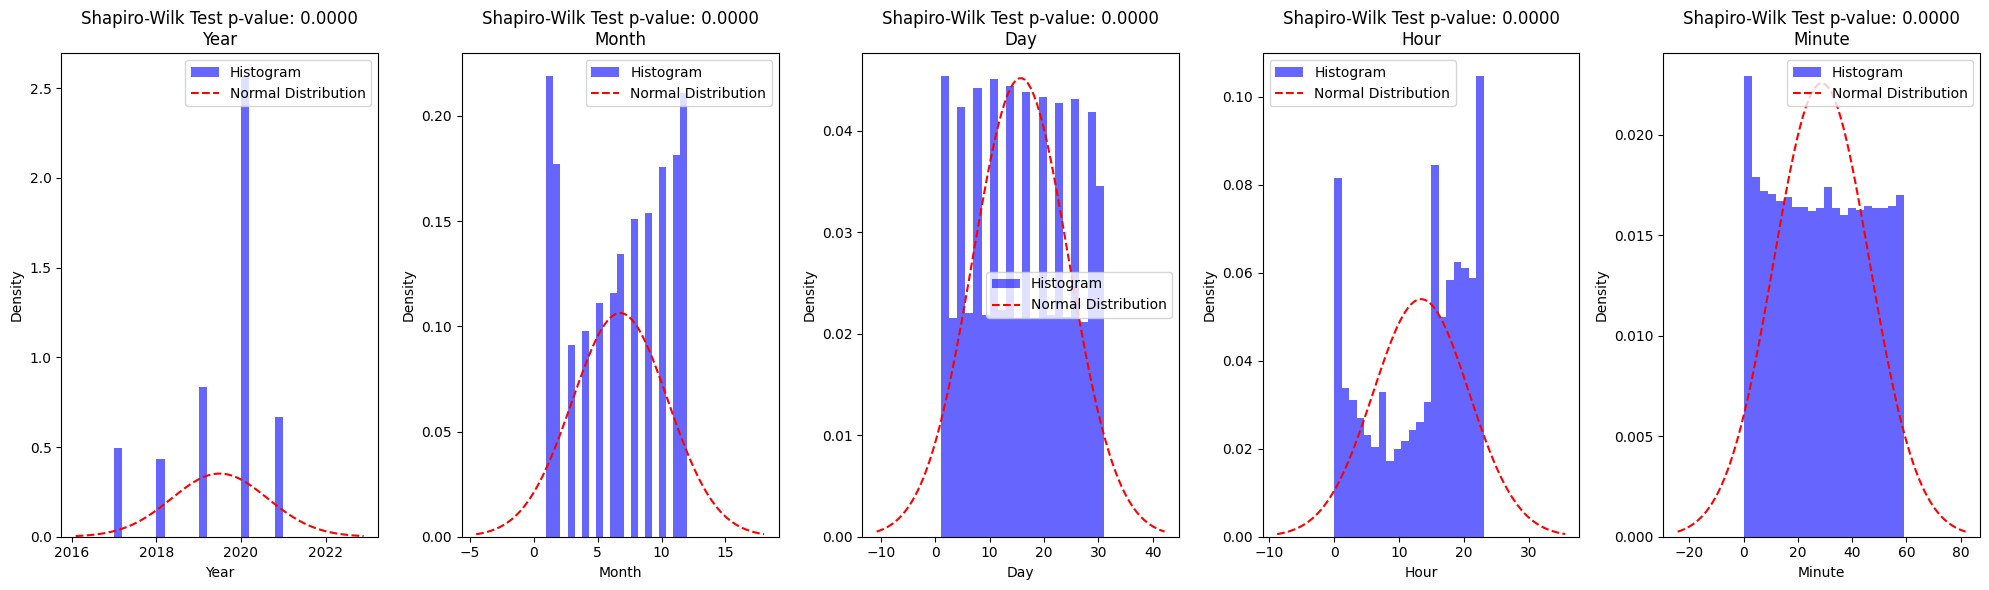

In [18]:
# List of columns to check for normality
columns_to_test = ['Year', 'Month', 'Day', 'Hour', 'Minute']

# Create subplots (1 row and 5 columns, adjust based on your columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

# Initialize lists to store Shapiro-Wilk test results
shapiro_p_values = []

# Loop over each column to test for normality using Shapiro-Wilk test
for i, column in enumerate(columns_to_test):
    # Perform Shapiro-Wilk test for normality
    shapiro_stat, shapiro_p_value = stats.shapiro(df[column].dropna())  # dropna to remove NaN values

    # Store p-values
    shapiro_p_values.append(shapiro_p_value)

    # Output the Shapiro-Wilk test result and interpretation
    print(f"Shapiro-Wilk Test for '{column}':")
    print(f"Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p_value:.4f}")

    # Interpretation based on the p-value
    if shapiro_p_value > 0.05:
        print(f"The data in column '{column}' follows a normal distribution.")
    else:
        print(f"The data in column '{column}' does not follow a normal distribution.")

    print("-" * 50)

    # Plot the histogram and normal distribution curve
    column_data = df[column]

    # Calculate mean and standard deviation for the normal distribution curve
    mean = np.mean(column_data)
    std_dev = np.std(column_data)

    # Create a range of values for the x-axis (within 3 standard deviations)
    x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)

    # Calculate the normal distribution (PDF) using the mean and standard deviation
    pdf = stats.norm.pdf(x, mean, std_dev)

    # Plot the histogram and normal distribution curve
    axes[i].hist(column_data, bins=20, density=True, alpha=0.6, color='blue', label='Histogram')
    axes[i].plot(x, pdf, color='red', linestyle='--', label='Normal Distribution')
    axes[i].set_title(f"Shapiro-Wilk Test p-value: {shapiro_p_value:.4f}\n{column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Adjust layout for better readability
plt.tight_layout()
plt.show()

**Note:** The Shapiro-Wilk test indicates that the data in the Year, Month, Day, Hour, and Minute columns does not follow a normal distribution. This finding is expected due to the time-based nature of the dataset. Non-normality is often observed in data influenced by cyclic patterns and external temporal factors.

Feature Engineering

In [19]:
# Extract time-based features from the index (which is 'Date Posted')
df['Hour'] = df.index.hour  # Hour of the day (0-23)
df['Day'] = df.index.day    # Day of the month (1-31)
df['Month'] = df.index.month  # Month of the year (1-12)
df['Minute'] = df.index.minute  # Minute of the hour (0-59)

# Extract additional features like Day of the Week
df['Day_of_Week'] = df.index.day_name()  # Day name (e.g., Monday, Tuesday)

# Feature Engineering: Classify days as 'Weekday' or 'Weekend' based on Day_of_Week
weekday_to_weekend = {
    'Monday': 'Weekday', 'Tuesday': 'Weekday', 'Wednesday': 'Weekday', 'Thursday': 'Weekday', 'Friday': 'Weekday',
    'Saturday': 'Weekend', 'Sunday': 'Weekend'
}

# Create a new column 'Day_Type' that classifies days as 'Weekday' or 'Weekend'
df['Day_Type'] = df['Day_of_Week'].map(weekday_to_weekend)

# Create a categorical feature for the time of day (Morning, Afternoon, Evening, Night)
df['Time_of_Day'] = pd.cut(df['Hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

# Display the first few rows of the dataframe after feature engineering
print(df[['Month', 'Day', 'Hour', 'Minute', 'Day_of_Week', 'Day_Type', 'Time_of_Day']].head())


                     Month  Day  Hour  Minute Day_of_Week Day_Type Time_of_Day
Date Posted                                                                   
2019-12-05 21:18:00     12    5    21      18    Thursday  Weekday     Evening
2019-12-05 14:25:00     12    5    14      25    Thursday  Weekday   Afternoon
2019-03-05 15:18:00      3    5    15      18     Tuesday  Weekday   Afternoon
2019-02-05 16:40:00      2    5    16      40     Tuesday  Weekday   Afternoon
2019-04-25 16:51:00      4   25    16      51    Thursday  Weekday   Afternoon


Trend & Pattern Analysis
- Purpose: analyze variations in user activity over time by focusing on hourly, daily, and monthly patterns while observing trends in the data, such as peak activity times and periods of decline.

1- Visualize Overall Activity Trends Across Time Using GroupBy Function.

In [20]:
# Set the common layout properties for all plots
layout = dict(
    plot_bgcolor='lightgrey',  # Set background color
    paper_bgcolor='lightgrey',  # Set paper background
    font=dict(color='black'),  # Set text color
    hovermode='closest',
    height=300,  # Adjust the height of the plot
    width=600,  # Adjust the width of the plot
)

In [21]:
# Plot activity by hour of the day (line plot)
hourly_activity = df.groupby('Hour').size().reindex(range(0, 24), fill_value=0)  # Ensure every hour from 0 to 23 is included

fig_hourly = go.Figure()

fig_hourly.add_trace(go.Scatter(
    x=hourly_activity.index,
    y=hourly_activity.values,
    mode='lines+markers',
    line=dict(color='skyblue'),
    marker=dict(size=8, color='skyblue')
))

fig_hourly.update_layout(
    title='Activity Distribution by Hour of the Day',
    xaxis_title='Hour of the Day',
    yaxis_title='Number of Posts',
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=1,
        tickangle=45  # Rotate x-axis labels by 45 degrees
    )
)

fig_hourly.update_layout(layout)  # Apply common layout properties
fig_hourly.show()

In [22]:
# Plot activity by day of the week (line plot)
activity_by_day = df.groupby('Day_of_Week').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                                                            'Sunday'])

fig_day_of_week = go.Figure()

fig_day_of_week.add_trace(go.Scatter(
    x=activity_by_day.index,
    y=activity_by_day.values,
    mode='lines+markers',
    line=dict(color='salmon'),
    marker=dict(size=8, color='salmon')
))

fig_day_of_week.update_layout(
    title='Activity Distribution by Day of the Week',
    xaxis_title='Day of the Week',
    yaxis_title='Number of Posts',
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1, 2, 3, 4, 5, 6],
        ticktext=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
        tickangle=45  # Rotate x-axis labels by 45 degrees
    )
)

fig_day_of_week.update_layout(layout)  # Apply common layout properties
fig_day_of_week.show()

In [23]:
# Plot activity by month (line plot)
activity_by_month = df.groupby('Month').size()

fig_monthly = go.Figure()

fig_monthly.add_trace(go.Scatter(
    x=activity_by_month.index,
    y=activity_by_month.values,
    mode='lines+markers',
    line=dict(color='green'),
    marker=dict(size=8, color='green')
))

fig_monthly.update_layout(
    title='Activity Distribution by Month',
    xaxis_title='Month',
    yaxis_title='Number of Posts',
    xaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  # Months 1 to 12
        ticktext=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',
                  'December'],
        tickangle=45  # Rotate x-axis labels by 45 degrees
    )
)

fig_monthly.update_layout(layout)  # Apply common layout properties
fig_monthly.show()

2- Multivariate analysis (Correlation between Features)
- Purpose: Identify Peak Periods of Activity.

The peak hour of activity is: 19 o'clock
The peak day of the week for activity is: Thursday


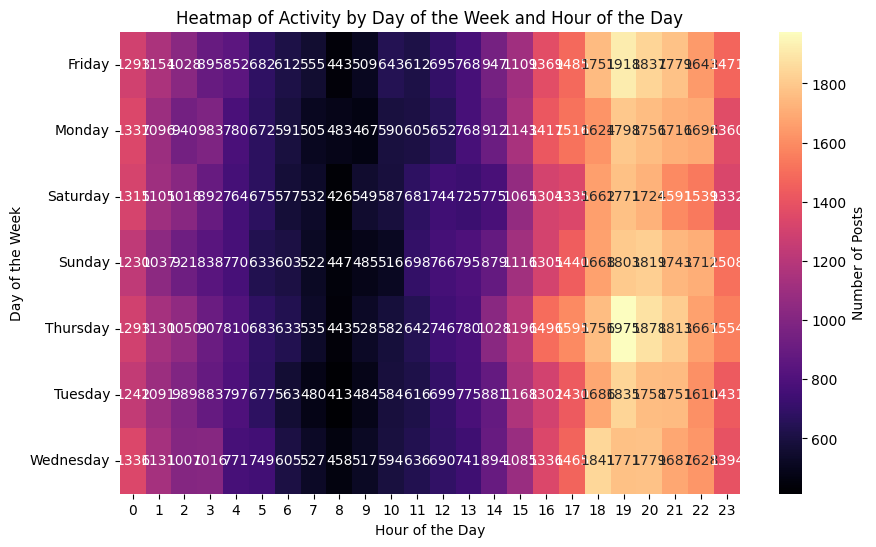

In [24]:
# Identify peak activity periods (for hour of the day and day of the week)
# Peak activity by hour (find the hour with the highest activity)
peak_hour = df.groupby('Hour').size().idxmax()
print(f"The peak hour of activity is: {peak_hour} o'clock")

# Peak activity by day of the week (find the day with the highest activity)
peak_day_of_week = df.groupby('Day_of_Week').size().idxmax()
print(f"The peak day of the week for activity is: {peak_day_of_week}")

# Optionally, plot a heatmap of activity over the day of the week and hour of the day
activity_heatmap = df.groupby(['Day_of_Week', 'Hour']).size().unstack().fillna(0)

# Set figure size and create the heatmap
plt.figure(figsize=(10, 6))

# Change the color set for the heatmap
sns.heatmap(activity_heatmap, cmap="magma", annot=True, fmt="d", cbar_kws={'label': 'Number of Posts'})

# Titles and labels
plt.title('Heatmap of Activity by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

# Show the plot
plt.show()

Note: The multivariate analysis aims to identify the day of the week and the time of the highest user interaction during the data collection period. For this, the two independent variables ('Day_of_Week' and 'Hour') were grouped using the Groupby method, in order to determine the peak of activity, which is the dependent variable.

3- Seasonality

In [25]:
# Define the threshold date (e.g., after January 1, 2017)
# According to the reducing in outliers
threshold_date = pd.Timestamp('2017-01-01')

# Filter out the rows where 'Date Posted' is before the threshold date
df_cleaned = df[df.index >= threshold_date]

# Generate the full range of dates between the minimum and maximum of the cleaned index
missing_dates = pd.date_range(start=df_cleaned.index.min(), end=df_cleaned.index.max(), freq='D').difference(df_cleaned.index)

# Create a DataFrame for missing dates
missing_dates_df = pd.DataFrame(missing_dates, columns=['Missing Dates'])

# Display the missing dates in a table format
print("Missing Dates Table:")
print(missing_dates_df)

# Calculate the total count of missing dates
total_missing = len(missing_dates)

# Display the total count of missing dates
print("\nTotal Missing Dates:", total_missing)

Missing Dates Table:
           Missing Dates
0    2017-01-02 00:30:00
1    2017-01-03 00:30:00
2    2017-01-04 00:30:00
3    2017-01-05 00:30:00
4    2017-01-06 00:30:00
...                  ...
1648 2021-11-27 00:30:00
1649 2021-11-28 00:30:00
1650 2021-11-29 00:30:00
1651 2021-11-30 00:30:00
1652 2021-12-01 00:30:00

[1653 rows x 1 columns]

Total Missing Dates: 1653


Note: To effectively analyze seasonality and time series patterns, it is essential to examine any missing dates in the dataset. This step ensures that the dataset can be properly resampled and completed. For accurate analysis, the data must be continuous and consistent, without any gaps, so that misleading conclusions are avoided. Missing or irregular data can distort the detection of patterns, trends, and seasonal effects, which are essential for reliable forecasting and modeling.

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample to daily frequency, getting the count of posts per day using the cleaned data
daily_data = df_cleaned.resample('D').size()

# Replace zeros with NaN to treat missing days as NaN
daily_data[daily_data == 0] = np.nan

# Interpolate the missing values (linear interpolation)
daily_data = daily_data.interpolate(method='linear')

# Check for remaining NaN values
num_nans = daily_data.isna().sum()
print(f"Number of NaN values after interpolation: {num_nans}")

Number of NaN values after interpolation: 0


Imputing the missing values:

For this, in this particular study, Linear interpolation was chosen to deal with missing values, in which it calculates the linear relationship of the data range and thus estimates the missing values, fitting these gaps.

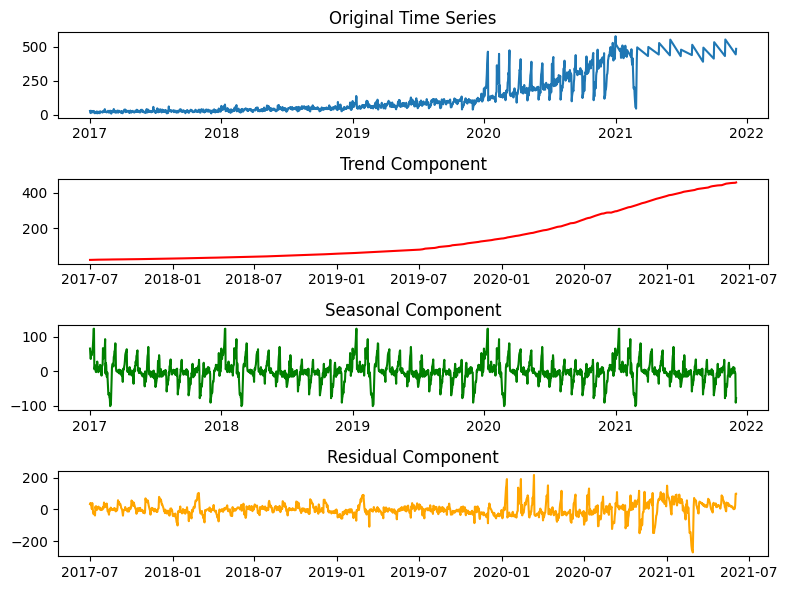

In [27]:
# Decompose the time series data
decomposition = seasonal_decompose(daily_data, model='additive', period=365)  # period=365 for yearly seasonality

# Plot the decomposed components
plt.figure(figsize=(8, 6))

# Plot the observed (original) series
plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Original Time Series')

# Plot the trend component
plt.subplot(412)
plt.plot(decomposition.trend, color='red')
plt.title('Trend Component')

# Plot the seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, color='green')
plt.title('Seasonal Component')

# Plot the residual (remainder) component
plt.subplot(414)
plt.plot(decomposition.resid, color='orange')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [28]:
# Group the cleaned data by 'Date Posted' and count the entries for each date
original_grouped = df_cleaned.groupby(df_cleaned.index.date).size()

# Count of the grouped original data (unique dates)
original_count = len(original_grouped)

# Count of the resampled data (using the index of the resampled DataFrame)
resampled_count = len(daily_data.index)

# Print both counts
print("Grouped Original Data Count:", original_count)
print("Resampled Data Count:", resampled_count)

# Calculate and print the difference in counts
difference = resampled_count - original_count
print("Difference in Count:", difference)

Grouped Original Data Count: 1519
Resampled Data Count: 1797
Difference in Count: 278


Note: The resampling process has filled in missing dates in the dataset, effectively adding 278 days. These additional days were previously missing from the original data.

In [29]:
from statsmodels.tsa.stattools import adfuller

# Preprocessing function to clean the data and return the cleaned series
def preprocess_data(df_cleaned):
    # Resample to daily frequency, getting the count of posts per day
    daily_data = df_cleaned.resample('D').size()

    # Replace zeros with NaN to treat missing days as NaN
    daily_data[daily_data == 0] = np.nan

    # Interpolate the missing values (linear interpolation)
    daily_data = daily_data.interpolate(method='linear')

    return daily_data

# Apply preprocessing to the cleaned data once
daily_data = preprocess_data(df_cleaned)

# Perform the Augmented Dickey-Fuller (ADF) test on the cleaned daily data
result = adfuller(daily_data.dropna())  # Ensure no NaNs are present

print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Check if the data is stationary
if result[1] > 0.05:
    print("The data is not stationary, perform differencing.")
else:
    print("The data is stationary.")

ADF Statistic: 0.07570638311463411
p-value: 0.9643627772133131
The data is not stationary, perform differencing.


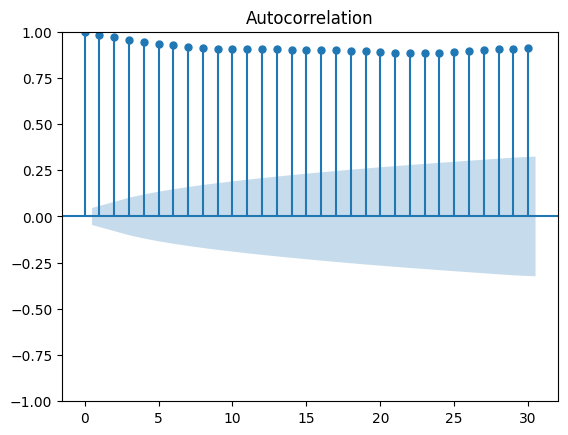

In [30]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF (Autocorrelation Function) for the cleaned data with a lag of 30
plot_acf(daily_data, lags=30)
plt.show()

In [31]:
# Apply first differencing
daily_data_diff = daily_data.diff().dropna()

# Perform the Augmented Dickey-Fuller (ADF) test on the differenced data
result = adfuller(daily_data_diff)

# Print ADF Statistic and p-value for differenced data
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Check if the differenced data is stationary
if result[1] > 0.05:
    print("The differenced data is not stationary, perform further differencing.")
else:
    print("The differenced data is stationary.")

ADF Statistic: -17.14799427361532
p-value: 6.973083535648778e-30
The differenced data is stationary.


Note:
- Before differencing, the time series showed non-stationarity, as indicated by a high p-value of 0.96 in the ADF test, meaning the null hypothesis of non-stationarity could not be rejected.
- After first differencing, the series became stationary, with a much more negative ADF statistic of -17.15 and a p-value close to 0, strongly rejecting the null hypothesis of non-stationarity.
- The differenced series is now stationary and suitable for modeling with techniques like ARIMA.


In [32]:
# Get the minimum and maximum values of your time series data (daily_data)
min_value = daily_data_diff.min()
max_value = daily_data_diff.max()

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: -360.0
Maximum value: 196.0


4- Time Series using SARIMA
- Purpose: forecasting or predicting future values based on past data that is indexed by time.

SARIMA - Average MAE: 21.653179333121805, Average RMSE: 31.536579739689603


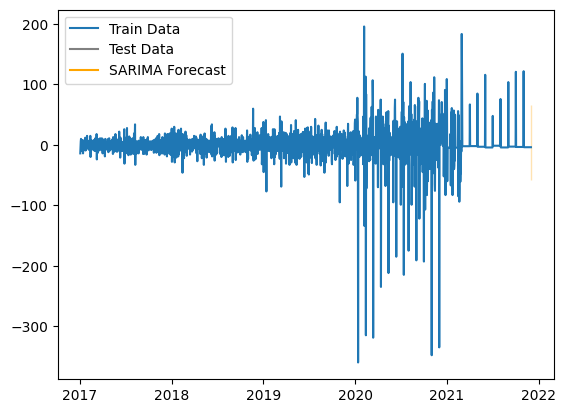

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define a function for time-series cross-validation
def time_series_cv(data, n_splits):
    split_size = len(data) // n_splits
    for i in range(n_splits):
        train = data[:(split_size * (i + 1))]
        test = data[(split_size * (i + 1)):(split_size * (i + 2))]
        yield train, test

# Evaluation function for MAE and RMSE
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

# Cross-validation for SARIMA model
sarima_mae = []
sarima_rmse = []

for train, test in time_series_cv(daily_data_diff, n_splits=5):
    # Fit SARIMA model on differenced data
    sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
    sarima_fit = sarima_model.fit(disp=False)

    # Forecast for the test period
    forecast = sarima_fit.get_forecast(steps=len(test))
    forecast_index = test.index  # Use the test data index

    # Calculate error metrics
    mae, rmse = evaluate_model(test, forecast.predicted_mean)
    sarima_mae.append(mae)
    sarima_rmse.append(rmse)

# Calculate average performance metrics across all folds
average_mae = np.mean(sarima_mae)
average_rmse = np.mean(sarima_rmse)

print(f"SARIMA - Average MAE: {average_mae}, Average RMSE: {average_rmse}")

# Plot the results for the last fold
train, test = list(time_series_cv(daily_data_diff, n_splits=5))[-1]  # Last fold
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_fit = sarima_model.fit(disp=False)

forecast = sarima_fit.get_forecast(steps=len(test))
forecast_index = test.index
plt.plot(train.index, train, label='Train Data')
plt.plot(test.index, test, label='Test Data', color='gray')
plt.plot(forecast_index, forecast.predicted_mean, label='SARIMA Forecast', color='orange')
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='orange', alpha=0.3)
plt.legend()
plt.show()

Note: The data spans from a minimum value of 2017 to a maximum value of 2021, resulting in a total range of 4 years.

An MAE of 21.65 and an RMSE of 31.54 might suggest that the model is performing reasonably well, as the errors are a relatively small fraction of the overall range of the data.
- For example, the RMSE is approximately 3.36% of the total range (4 years), and the MAE is around 1.91% of the range. These error values indicate that the model is effectively capturing most of the trend and variability in the data, with the errors being small relative to the overall spread of values.

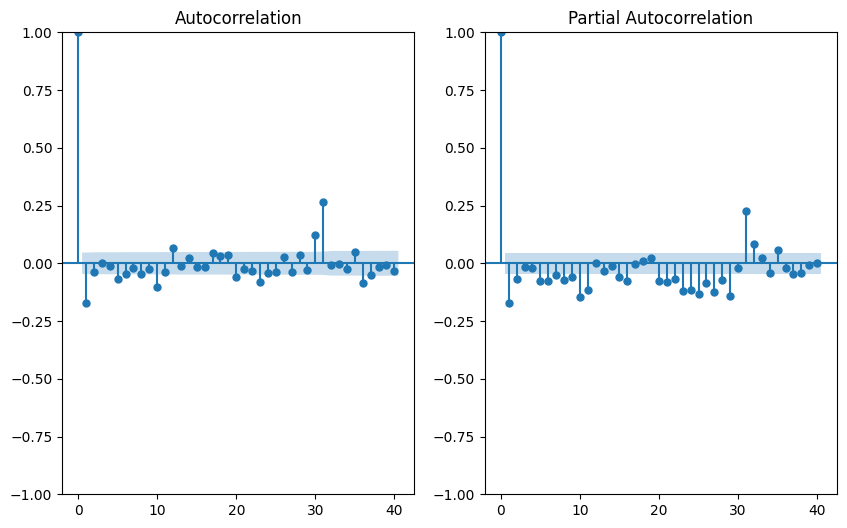

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for differenced data to get p, q, P, Q, and d
plt.figure(figsize=(10, 6))
plt.subplot(121)
plot_acf(daily_data_diff, lags=40, ax=plt.gca())  # Use differenced data
plt.subplot(122)
plot_pacf(daily_data_diff, lags=40, ax=plt.gca())
plt.show()

In [35]:
# !pip install pmdarima

In [36]:
from pmdarima import auto_arima

# Fit SARIMA model using auto_arima (automatically selects the best parameters)
auto_model = auto_arima(daily_data_diff, seasonal=True, m=7, trace=True,
                        stepwise=True, suppress_warnings=True)

# View the selected model parameters
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=17395.469, Time=8.42 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=17566.783, Time=0.11 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=17515.739, Time=0.65 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=17508.444, Time=2.05 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=17564.895, Time=0.04 sec
 ARIMA(2,0,2)(0,0,1)[7] intercept   : AIC=17395.000, Time=4.97 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : AIC=17393.407, Time=2.23 sec
 ARIMA(2,0,2)(1,0,0)[7] intercept   : AIC=17394.986, Time=7.30 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=17392.340, Time=1.72 sec
 ARIMA(1,0,2)(1,0,0)[7] intercept   : AIC=17393.842, Time=2.36 sec
 ARIMA(1,0,2)(0,0,1)[7] intercept   : AIC=17393.858, Time=3.83 sec
 ARIMA(1,0,2)(1,0,1)[7] intercept   : AIC=17394.179, Time=7.77 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=17508.585, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=17397.753, Time=1.28 sec
 ARIMA(1,0,3)(0,0,0

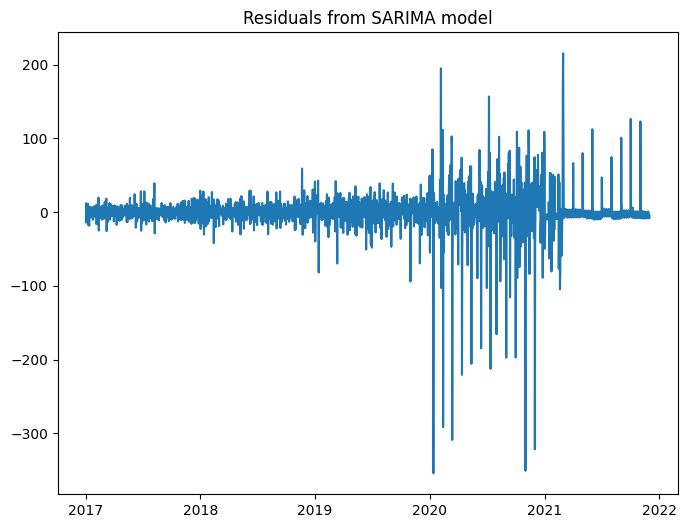

In [37]:
residuals = sarima_fit.resid
plt.figure(figsize=(8, 6))
plt.plot(residuals)
plt.title('Residuals from SARIMA model')
plt.show()

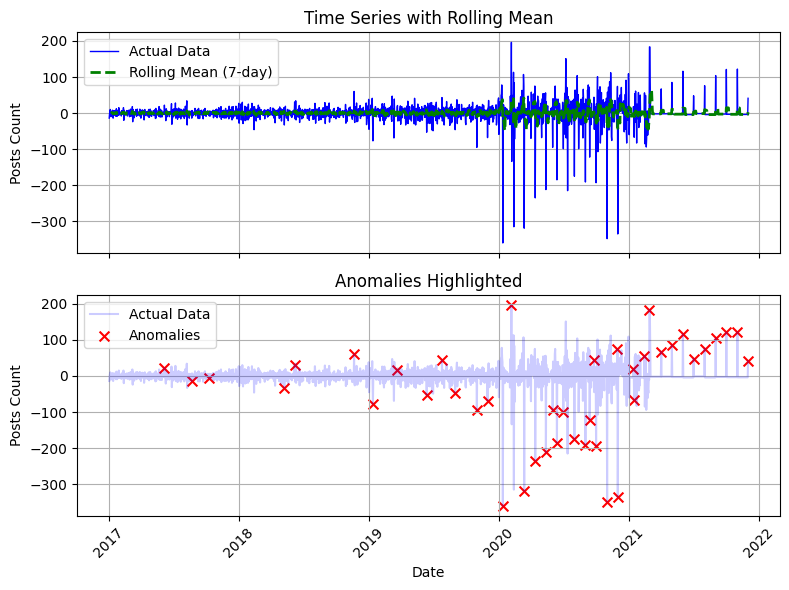

In [38]:
# Compute rolling mean and standard deviation
rolling_mean = daily_data_diff.rolling(window=7).mean()
rolling_std = daily_data_diff.rolling(window=7).std()

# Identify anomalies
anomalies = daily_data_diff[(daily_data_diff > rolling_mean + 2 * rolling_std) | (daily_data_diff < rolling_mean - 2 * rolling_std)]

# Create subplots to reduce clutter
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Plot the actual data and rolling mean on the first subplot
ax1.plot(daily_data_diff, label='Actual Data', color='blue', linewidth=1)
ax1.plot(rolling_mean, label='Rolling Mean (7-day)', color='green', linestyle='--', linewidth=2)
ax1.set_title('Time Series with Rolling Mean', fontsize=12)
ax1.set_ylabel('Posts Count', fontsize=10)
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot only the anomalies on the second subplot
ax2.plot(daily_data_diff, label='Actual Data', color='blue', alpha=0.2)  # Lightly plot the data for context
ax2.scatter(anomalies.index, anomalies, color='red', label='Anomalies', s=50, marker='x')
ax2.set_title('Anomalies Highlighted', fontsize=12)
ax2.set_xlabel('Date', fontsize=10)
ax2.set_ylabel('Posts Count', fontsize=10)
ax2.legend(loc='upper left')
ax2.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

**Note:**
**Rolling Mean (Moving Average)**: is a statistical method that smooths out data fluctuations (reduces noise) by averaging values over a specified time frame, producing a smoother curve compared to the raw data. This makes underlying trends more apparent. A consistent upward or downward movement in the rolling mean indicates a stable trend, while a stable mean suggests minimal change.
- In this context, a 7-day rolling window is employed, meaning each data point represents the average of the past 7 days, including the current day.

**Anomalies (Outliers)**: are pinpointed by examining data points that significantly diverge from the expected pattern based on the rolling mean and standard deviation.
- Anomalies are detected by comparing individual data points to the rolling mean ± 2 times the rolling standard deviation.
- This approach assumes that the data follows a roughly normal distribution, in which extreme values (outliers) are uncommon.

Deep Learning with Long short-term memory (LSTM)
- Data Normalization Using MinMaxScaler and Train-Test Split for Time Series Forecasting

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Preview the data
print(daily_data_diff.head())

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(daily_data_diff.values.reshape(-1, 1))  # Scaling the data

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define time step
time_step = 60  # Use last 60 days to predict the next day

# Create dataset
X, y = create_dataset(data_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM input

# Split the data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Date Posted
2017-01-02   -14.0
2017-01-03    -2.0
2017-01-04     6.0
2017-01-05    10.0
2017-01-06     0.0
Freq: D, dtype: float64


Build the LSTM Model

In [40]:
# pip install keras-tuner

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - loss: 0.0683 - val_loss: 0.0030
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 187ms/step - loss: 0.0064 - val_loss: 0.0026
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - loss: 0.0051 - val_loss: 0.0026
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - loss: 0.0055 - val_loss: 0.0026
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - loss: 0.0055 - val_loss: 0.0025
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - loss: 0.0056 - val_loss: 0.0026
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - loss: 0.0056 - val_loss: 0.0025
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - loss: 0.0051 - val_loss: 0.0027
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - loss: 0.0059 - val_loss: 0.0028
Epoch 10/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - loss: 0.0058 - val_loss: 0.0025
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step
Test RMSE: 28.02077040234487
Test MAE: 12.124222320421024


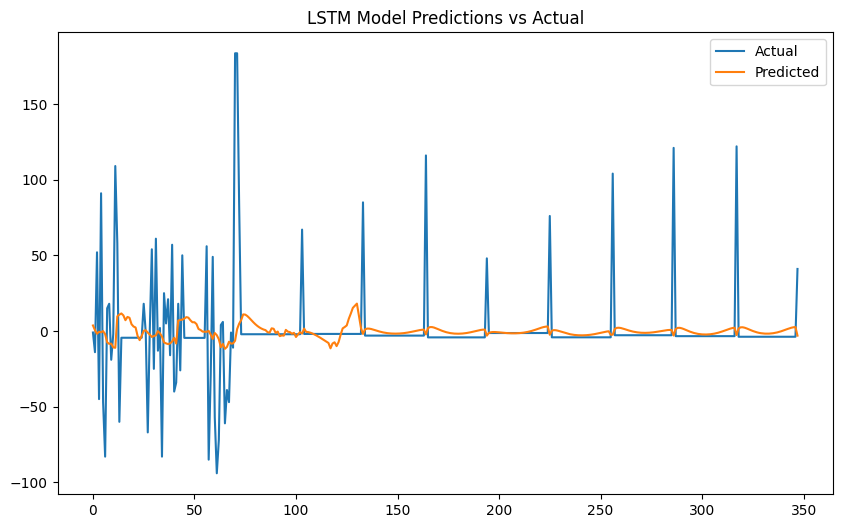

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping
from math import sqrt

# Build the LSTM model
model = Sequential()

# First LSTM layer with 100 units, Bidirectional, and Dropout
model.add(Bidirectional(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1))))
model.add(Dropout(0.2))

# Second LSTM layer with 50 units and Dropout
model.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model.add(Dropout(0.2))

# Output layer with 1 unit (regression task)
model.add(Dense(units=1))

# Compile the model with Adam optimizer and mean squared error loss
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping: stop if validation loss does not improve for 3 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the LSTM model with early stopping (use 20 epochs)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test),
                    verbose=1, callbacks=[early_stopping])

# Make predictions using the trained model
predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
predictions_inversed = scaler.inverse_transform(predictions)

# Inverse transform the actual test data
y_test_inversed = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model using RMSE
rmse = sqrt(mean_squared_error(y_test_inversed, predictions_inversed))
print(f'Test RMSE: {rmse}')

# Add Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_inversed, predictions_inversed)
print(f'Test MAE: {mae}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_inversed, label='Actual')
plt.plot(predictions_inversed, label='Predicted')
plt.legend()
plt.title('LSTM Model Predictions vs Actual')
plt.show()

Descriptive Statistics II: Weekdays, Weekends & Average Hour

In [42]:
from sklearn.preprocessing import LabelEncoder

# Check the shape of your DataFrame
print("Original DataFrame shape:", df.shape)

# Apply LabelEncoder to the 'Day_Type' column to get numeric encoding
label_encoder = LabelEncoder()

# Apply the encoding directly to the existing 'Day_Type' column
df['Day_Type_encoded'] = label_encoder.fit_transform(df['Day_Type'])

# Display the first few rows to confirm the encoding
print(df[['Day_of_Week', 'Day_Type', 'Day_Type_encoded']].head())

Original DataFrame shape: (178922, 9)
                    Day_of_Week Day_Type  Day_Type_encoded
Date Posted                                               
2019-12-05 21:18:00    Thursday  Weekday                 0
2019-12-05 14:25:00    Thursday  Weekday                 0
2019-03-05 15:18:00     Tuesday  Weekday                 0
2019-02-05 16:40:00     Tuesday  Weekday                 0
2019-04-25 16:51:00    Thursday  Weekday                 0


In [43]:
# Compute basic statistics for weekdays and weekends
weekday_data = df[df['Day_Type_encoded'] == 0]  # Weekdays
weekend_data = df[df['Day_Type_encoded'] == 1]  # Weekends

# Get the count of posts per day of the week for weekdays and weekends
weekday_counts = weekday_data['Day_of_Week'].value_counts()
weekend_counts = weekend_data['Day_of_Week'].value_counts()

# Get average hour of activity for weekdays and weekends
weekday_avg_hour = weekday_data['Hour'].mean()
weekend_avg_hour = weekend_data['Hour'].mean()

print("Weekday Counts:")
print(weekday_counts)

print("\nWeekend Counts:")
print(weekend_counts)

print(f"\nAverage Hour for Weekdays: {weekday_avg_hour}")
print(f"Average Hour for Weekends: {weekend_avg_hour}")


Weekday Counts:
Day_of_Week
Thursday     26720
Friday       26050
Wednesday    25658
Monday       25407
Tuesday      25145
Name: count, dtype: int64

Weekend Counts:
Day_of_Week
Sunday      25254
Saturday    24688
Name: count, dtype: int64

Average Hour for Weekdays: 13.39627849278958
Average Hour for Weekends: 13.396840334788354


In [44]:
# Count the number of occurrences of unique values in the 'Day_Type' column
day_type_counts = df['Day_Type'].value_counts()

# Create a new DataFrame to combine counts
day_type_summary = pd.DataFrame({
    'Count': day_type_counts
})

# Create an interactive bar chart with Plotly
fig = go.Figure()

# Use the 'Viridis' color scale and map it to the 'Count' values
fig.add_trace(go.Bar(
    x=day_type_summary.index,
    y=day_type_summary['Count'],
    marker=dict(
        color=day_type_summary['Count'],  # Color bars based on count
        colorscale='Viridis',  # Apply the Viridis color scale
        showscale=True  # Display color scale
    )
))

# Update layout to make it more interactive
fig.update_layout(
    title='Distribution of Weekdays vs Weekends',
    xaxis_title='Day Type',
    yaxis_title='Count',
    plot_bgcolor='lightgrey',  # Set background to grey
    paper_bgcolor='lightgrey',  # Set paper background to grey
    font=dict(color='black'),  # Set font color to black for contrast
    hovermode='closest',  # Enable hover
    height=400,  # Adjust height of the plot
    width=600,  # Adjust width of the plot
)

# Show the interactive plot
fig.show()

**Note:** Weekdays tend to have more activity on Instagram compared to weekends, with Thursday and Friday being the days that see the highest number of posts. Although activity decreases over the weekend, Sunday exhibits more interaction than Saturday.

In general, regardless of whether it is a weekday or weekend, the peak activity on Instagram occurs around 13:40 min.

**Insight:** This information is vital for marketing companies to post their advertisements at times of highest activity, enabling them to reach a larger audience and convert them into potential customers.

Encode Categorical Data

In [45]:
# Encode 'Day_of_Week' using LabelEncoder
le_day = LabelEncoder()
df['Day_of_Week_encoded'] = le_day.fit_transform(df['Day_of_Week'])

# Encode 'Type' column using LabelEncoder
le_type = LabelEncoder()
df['Type_encoded'] = le_type.fit_transform(df['Type'])  # For multiple categories like Image, Images, Video

# Display the first few rows to confirm the encoding
print(df[['Day_of_Week', 'Day_Type', 'Day_of_Week_encoded', 'Type', 'Type_encoded']].head())

                    Day_of_Week Day_Type  Day_of_Week_encoded    Type  \
Date Posted                                                             
2019-12-05 21:18:00    Thursday  Weekday                    4   Image   
2019-12-05 14:25:00    Thursday  Weekday                    4   Image   
2019-03-05 15:18:00     Tuesday  Weekday                    5  Images   
2019-02-05 16:40:00     Tuesday  Weekday                    5  Images   
2019-04-25 16:51:00    Thursday  Weekday                    4  Images   

                     Type_encoded  
Date Posted                        
2019-12-05 21:18:00             0  
2019-12-05 14:25:00             0  
2019-03-05 15:18:00             1  
2019-02-05 16:40:00             1  
2019-04-25 16:51:00             1  


In [46]:
# Check unique values in 'Type_encoded' to ensure correct encoding
print("Unique values in 'Type_encoded':", df['Type_encoded'].unique())

# Check the value counts to see how many instances of each category
print("\nValue counts for 'Type_encoded':")
print(df['Type_encoded'].value_counts())

# If you want to map the encoded values back to the original labels, you can use the LabelEncoder
print("\nMapping of encoded values to original categories:")
for encoded, original in zip(range(len(le_type.classes_)), le_type.classes_):
    print(f"{encoded}: {original}")

Unique values in 'Type_encoded': [0 1 2]

Value counts for 'Type_encoded':
Type_encoded
0    114181
1     36223
2     28518
Name: count, dtype: int64

Mapping of encoded values to original categories:
0: Image
1: Images
2: Video


**Machine Learning Models**: Supervised & Unsupervised learning.

Prediction Model: Random Forest and Gradient Boosting

Purpose: Predict the type of post based on input features such as day and time. Random Forest and Gradient Boosting were used to predict categorical outcomes. In the context of imbalanced datasets, Random Forest has an advantage over other algorithms like Logistic Regression, as it is an ensemble learning method that naturally handles imbalances better.
- The model is trained on labeled data to classify the type of post that will be made, based on the specific day and time. This classification helps predict whether a post will belong to categories like "image," "images," or "video," for example, depending on the time of the day.

1.1- Prepare Data for Prediction

In [47]:
# Features: Day of the week and Hour
X = df[['Day_of_Week_encoded', 'Hour']]  # 'Hour' is already numeric, 'Day_of_Week' is encoded

# Target: Post Type (categorical outcomes like "Image", "Video", etc.)
y = df['Type_encoded']  # This is already correctly set as the target for type of post prediction

1.2- Split Data into Train and Test Sets

In [48]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

1.3 Random Forest Classifier (Supervised Model)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize RandomForestClassifier with class_weight='balanced' to handle imbalance
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.29      0.40     34255
           1       0.21      0.24      0.22     10867
           2       0.17      0.52      0.26      8555

    accuracy                           0.32     53677
   macro avg       0.35      0.35      0.29     53677
weighted avg       0.49      0.32      0.34     53677




Summary of Tree Depths in the Random Forest:
Mean Depth: 12.74
Min Depth: 11
Max Depth: 15
Standard Deviation of Depths: 0.94


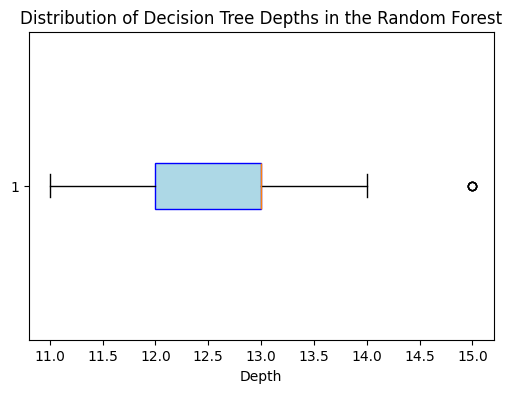

In [50]:
from sklearn.tree import export_text

# Extract the depths of all trees in the RandomForest
tree_depths = [tree.get_depth() for tree in rf_model.estimators_]

# Summary statistics
mean_depth = np.mean(tree_depths)
min_depth = np.min(tree_depths)
max_depth = np.max(tree_depths)
std_depth = np.std(tree_depths)

# Print summary statistics
print(f"\nSummary of Tree Depths in the Random Forest:")
print(f"Mean Depth: {mean_depth:.2f}")
print(f"Min Depth: {min_depth}")
print(f"Max Depth: {max_depth}")
print(f"Standard Deviation of Depths: {std_depth:.2f}")

# Visualizing the distribution of tree depths (using a histogram or boxplot)
plt.figure(figsize=(6, 4))

# Boxplot for a concise summary of tree depth distribution
plt.boxplot(tree_depths, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.title('Distribution of Decision Tree Depths in the Random Forest')
plt.xlabel('Depth')
plt.show()

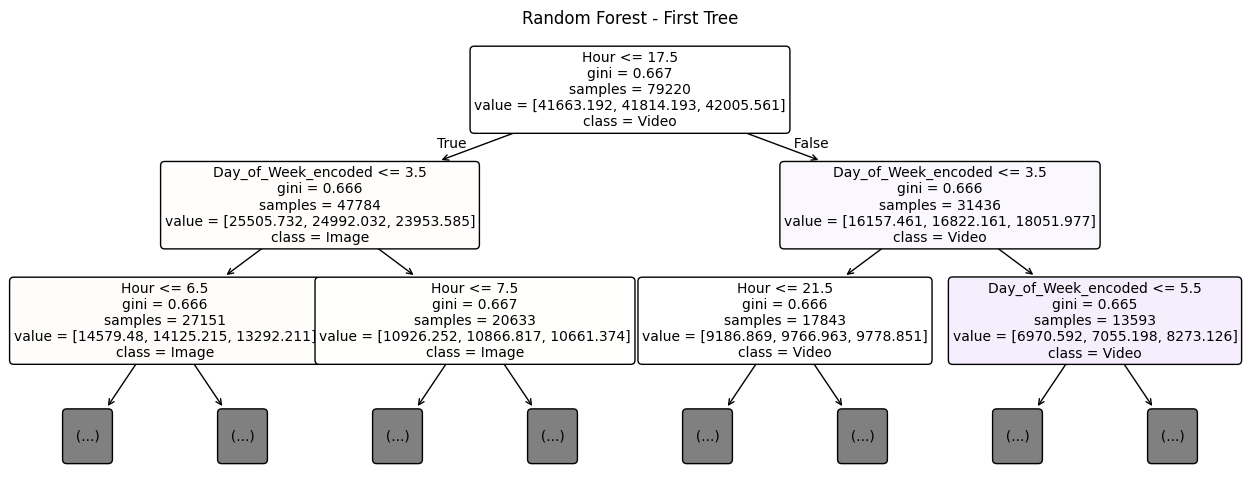

In [51]:
from sklearn.tree import plot_tree

# Display the first tree in a Random Forest
plt.figure(figsize=(16, 6))
plot_tree(rf_model.estimators_[0],
          feature_names=X.columns,
          class_names=le_type.classes_,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=2)  # Limit the depth for readability
plt.title("Random Forest - First Tree")
plt.show()

2- Gradient Boosting (Supervised Model)

In [52]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['Type_encoded'] == 0]
df_minority_1 = df[df['Type_encoded'] == 1]
df_minority_2 = df[df['Type_encoded'] == 2]

# Upsample minority class 1 and class 2
df_minority_1_upsampled = resample(df_minority_1,
                                   replace=True,     # Sample with replacement
                                   n_samples=len(df_majority),  # Match majority class size
                                   random_state=42)  # For reproducibility

df_minority_2_upsampled = resample(df_minority_2,
                                   replace=True,
                                   n_samples=len(df_majority),
                                   random_state=42)

# Combine the upsampled minority classes with the majority class
df_balanced = pd.concat([df_majority, df_minority_1_upsampled, df_minority_2_upsampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Re-define features and target
X = df_balanced[['Day_of_Week_encoded', 'Hour']]  # Features
y = df_balanced['Type_encoded']  # Target: Type of post (encoded)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

SEED = 42  # Set a seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=SEED)

# Fit Gradient Boosting Classifier (or use Random Forest if preferred)
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(loss='log_loss', random_state=SEED, n_estimators=100)
gbc.fit(X_train, y_train)

# Predict on the test set
y_pred = gbc.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.36      0.26      0.31     34254
           1       0.36      0.25      0.29     34254
           2       0.36      0.57      0.44     34255

    accuracy                           0.36    102763
   macro avg       0.36      0.36      0.35    102763
weighted avg       0.36      0.36      0.35    102763



K-fold cross-validation: Random Forest and Gradient Boost


In [53]:
from sklearn.model_selection import cross_val_score

# Define features and target
X = df[['Day_of_Week_encoded', 'Hour']]  # Features
y = df['Type_encoded']  # Target

# Initialize both models
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
gbc_model = GradientBoostingClassifier(loss='log_loss', random_state=42, n_estimators=100)

# Perform 5-fold cross-validation and get the accuracy scores for both models
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
gbc_cv_scores = cross_val_score(gbc_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores for Random Forest
print(f"Random Forest Cross-validation scores: {rf_cv_scores}")
print(f"Mean Random Forest cross-validation score: {rf_cv_scores.mean():.4f}")

# Print the cross-validation scores for Gradient Boosting
print(f"Gradient Boosting Cross-validation scores: {gbc_cv_scores}")
print(f"Mean Gradient Boosting cross-validation score: {gbc_cv_scores.mean():.4f}")

Random Forest Cross-validation scores: [0.31292441 0.33170323 0.30762352 0.2846803  0.32271406]
Mean Random Forest cross-validation score: 0.3119
Gradient Boosting Cross-validation scores: [0.63817242 0.63814447 0.63816231 0.63816231 0.63816231]
Mean Gradient Boosting cross-validation score: 0.6382


In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Check how the models dealt with the imbalance of the inputs
# Define features and target
X = df[['Day_of_Week_encoded', 'Hour']]  # Features
y = df['Type_encoded']  # Target

# Check class distribution before any modeling (to confirm imbalance)
class_counts_before = y.value_counts()
print(f"Class distribution before modeling:\n{class_counts_before}")

# For Gradient Boosting, check the class distribution after resampling
# Apply resampling (e.g., using SMOTE for Gradient Boosting)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after resampling (for Gradient Boosting model)
class_counts_after_resampling = pd.Series(y_resampled).value_counts()
print(f"\nClass distribution after resampling (for Gradient Boosting):\n{class_counts_after_resampling}")

# For Random Forest, just check class distribution
# Train Random Forest with class_weight='balanced'
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
rf_model.fit(X, y)

# Check class distribution after training the Random Forest (same as before resampling because no resampling was applied)
print(f"\nClass distribution before training Random Forest (no resampling applied):\n{class_counts_before}")

Class distribution before modeling:
Type_encoded
0    114181
1     36223
2     28518
Name: count, dtype: int64

Class distribution after resampling (for Gradient Boosting):
Type_encoded
0    114181
1    114181
2    114181
Name: count, dtype: int64

Class distribution before training Random Forest (no resampling applied):
Type_encoded
0    114181
1     36223
2     28518
Name: count, dtype: int64


Note: Model Performance Overview:
The Gradient Boosting model (0.6382) outperforms the Random Forest model (0.3119) based on cross-validation results. This is likely due to Gradient Boosting's ability to handle class imbalance more effectively by focusing on harder-to-predict instances, while Random Forest, despite using class_weight='balanced', may struggle with imbalances due to its random tree-building process. Gradient Boosting's sequential learning approach allows it to adapt better to the data, especially when the classes are imbalanced.

Overfitting vs. Underfitting: Evaluate how well the models fit the data


Random Forest - Cross-validation score analysis:
The model may be underfitting due to low accuracy.

Gradient Boosting - Cross-validation score analysis:
The model appears to be performing reasonably well with a balanced result.


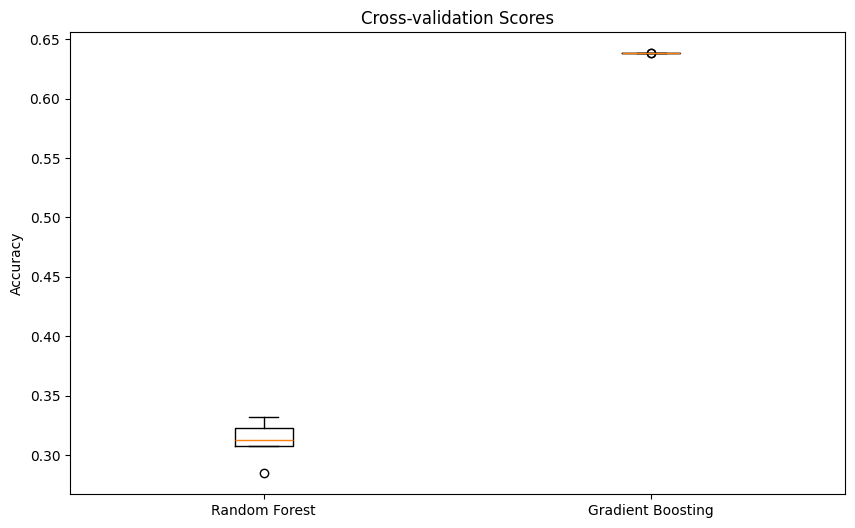

In [55]:
# Interpretation function to check for overfitting/underfitting
def check_overfitting_underfitting(model_name, cv_scores):
    score_variance = np.var(cv_scores)

    print(f"\n{model_name} - Cross-validation score analysis:")

    if score_variance > 0.05:
        print(f"The model may be overfitting due to high variance.")
    elif np.mean(cv_scores) < 0.5:
        print(f"The model may be underfitting due to low accuracy.")
    else:
        print(f"The model appears to be performing reasonably well with a balanced result.")

# Random Forest analysis
check_overfitting_underfitting("Random Forest", rf_cv_scores)

# Gradient Boosting analysis
check_overfitting_underfitting("Gradient Boosting", gbc_cv_scores)

# Plotting Cross-validation scores for both models
plt.figure(figsize=(10, 6))
plt.boxplot([rf_cv_scores, gbc_cv_scores], labels=['Random Forest', 'Gradient Boosting'])
plt.title('Cross-validation Scores')
plt.ylabel('Accuracy')
plt.show()

3- Clustering Model (Unsupervised Model)
- Purpose: group similar data points together based on some criteria, without requiring labeled data. The goal is to find natural groupings or patterns in the data.

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Perform Clustering with K-Means and Scaling
# Select the features for clustering
X = df[['Hour', 'Day_of_Week_encoded']]

# Scale the features to normalize them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering (with an example of 7 clusters)
kmeans = KMeans(n_clusters=7, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [57]:
# Function to categorize hour into Time of Day
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create the 'Time_of_Day' column
df['Time_of_Day'] = df['Hour'].apply(time_of_day)

# Group by Cluster and calculate the mean for Day_of_Week_encoded and Hour
cluster_summary = df.groupby('Cluster')[['Day_of_Week_encoded', 'Hour', 'Time_of_Day']].agg({
    'Day_of_Week_encoded': 'mean',
    'Hour': 'mean',
    'Time_of_Day': lambda x: x.mode()[0]  # Get the most frequent time of day for each cluster
})

# Display the cluster summary with Time of Day
print("Cluster Summary (Cluster, Day_of_Week_encoded, Hour, Time_of_Day):")
print(cluster_summary)

Cluster Summary (Cluster, Day_of_Week_encoded, Hour, Time_of_Day):
         Day_of_Week_encoded       Hour Time_of_Day
Cluster                                            
0                   3.535793   4.254438       Night
1                   1.599332  20.062685     Evening
2                   4.976597  18.300712     Evening
3                   0.000000   3.539200       Night
4                   1.277083  13.723220   Afternoon
5                   1.497175   3.144238       Night
6                   5.514533   4.453319       Night


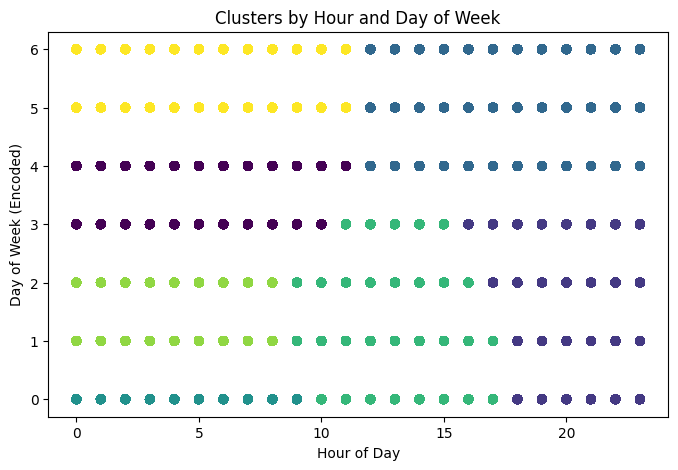

In [58]:
# Cluster Visualization

# Plot the clusters with fewer details (without annotations)
plt.figure(figsize=(8, 5))

# Scatter plot with clusters and Time of Day
plt.scatter(df['Hour'], df['Day_of_Week_encoded'], c=df['Cluster'], cmap='viridis', alpha=0.6)

# Add labels and title
plt.title('Clusters by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (Encoded)')

# Show the plot
plt.show()

Clustering Evaluation

In [59]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate the clustering using silhouette score and Davies-Bouldin index
# Use a smaller subset of the dataset for faster computation (optional)
X_sample = X_scaled[:1000]  # Use only the first 1000 samples (adjust as needed)
cluster_sample = df['Cluster'].iloc[:1000]  # Corresponding cluster labels for the sample

# Compute silhouette score and Davies-Bouldin index on the sample
sil_score = silhouette_score(X_sample, cluster_sample)
db_score = davies_bouldin_score(X_sample, cluster_sample)

# Output the results
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Score: {db_score:.3f}")

Silhouette Score: 0.346
Davies-Bouldin Score: 0.996


Note: The clustering performance was evaluated using the Silhouette Score and the Davies-Bouldin Index. The Silhouette Score of 0.346 indicates a moderate level of cohesion and separation between clusters, suggesting room for improvement. The Davies-Bouldin Score of 0.996 is relatively low, indicating that the clusters are fairly well-separated, but there might still be some overlap.


Reference:
- https://www.kaggle.com/datasets/vasileiosmpletsos/1100-instagram-users-datetime-posts-data
- https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python
- https://www.kaggle.com/code/onurderya/time-series-forecasting-with-ann-lstm
- https://scikit-learn.org/stable/supervised_learning.html
- https://scikit-learn.org/stable/modules/ensemble.html
- https://scikit-learn.org/stable/unsupervised_learning.html
- https://scikit-learn.org/stable/modules/clustering.html
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
- https://www.kaggle.com/code/kmkarakaya/keras-lstm-explained-in-details
- https://www.geeksforgeeks.org/ml-gradient-boosting/?ref=header_outind
- https://www.cloudzilla.ai/dev-education/missing-values-in-time-series/

